Camera Intrinsic matrix:
[[1.45750689e+03 0.00000000e+00 5.72298577e+02]
 [0.00000000e+00 1.46004781e+03 3.98878154e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Extrensic Matrix for Image 1 :-

 Rotation Matrix:
[[ 0.9998301  -0.00762314  0.01678262]
 [ 0.00714223  0.99956739  0.02853113]
 [-0.01699286 -0.02840642  0.99945201]]

 Translation Vectors:
[[-4.71148646]
 [-3.0838412 ]
 [21.33168889]]
-------------------------------------------------------------------


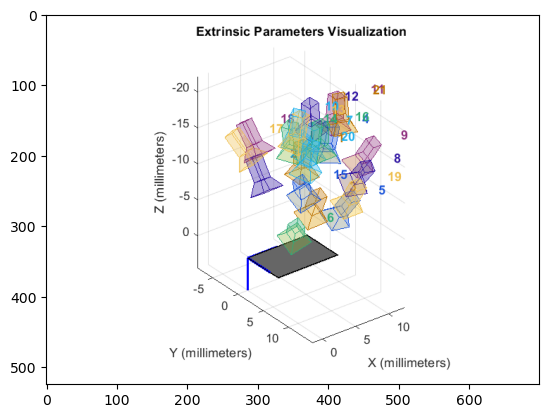

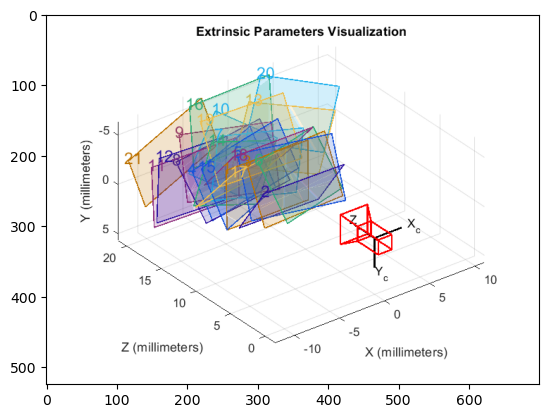

In [30]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob

# I tired using an iphone but due to high res (12MP) it was taking too long
# Thus I decided to use my webcam and forced it to a 0.9MP (1280x720) and it speeded up the process  

CHECKERBOARD_DIM = (7,10)


# Make corresponding 3D world points (assuming each square is 1 unit away)
# (0,0,0) (1,0,0) ... (6,0,0) (0,1,0)...(6,1,0) (0,9,0)..(6,9,0) Only inner points of checker
objectPoints_3D = np.zeros((1, CHECKERBOARD_DIM[0]* CHECKERBOARD_DIM[1],3), np.float32)
objectPoints_3D[0, :, :2] = np.mgrid[0:CHECKERBOARD_DIM[0],0:CHECKERBOARD_DIM[1]].T.reshape(-1, 2)


temp = objectPoints_3D[:,:,0].copy()
objectPoints_3D[:,:,0] = objectPoints_3D[:,:,1]
objectPoints_3D[:,:,1] = temp

#temp = list(objectPoints_3D[0,:,0])
#objectPoints_3D[0,:,0] = objectPoints_3D[0,:,1]
#objectPoints_3D[0,:,1] = temp
#objectPoints_3D = objectPoints_3D[:,::-1]

# array to store point pairs 
points_3D = []
points_2D = []

image = glob.glob('checker1.jpg')
# iterate trough all 21 checker images
for filename in image:
    img = cv.imread(filename)
 
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    ret, corners = cv.findChessboardCorners(gray, CHECKERBOARD_DIM,None)
    
    corners = corners[::-1]
    corners2 = np.zeros_like(corners)
    for i in range(0,CHECKERBOARD_DIM[0]*CHECKERBOARD_DIM[1]-1,CHECKERBOARD_DIM[0]):
        corners2[i:i+CHECKERBOARD_DIM[0],:,:] = corners[i:i+CHECKERBOARD_DIM[0],:,:][::-1]
    
    points_3D.append(objectPoints_3D)
    points_2D.append(corners2)

    cv.drawChessboardCorners(img, CHECKERBOARD_DIM,corners2, ret)
    cv.imshow('img', img)
    cv.waitKey(0)
    cv.destroyAllWindows()

# Once we have all point pairs I use the built in function of OpenCV to find intrinsic and extrinsic matrix for each Image
ret, matrix, distortion, r_vecs, t_vecs = cv.calibrateCamera(points_3D, points_2D, gray.shape[::-1], None, None)

# Displaying Intrinsic Matrix (focal length and scale)
print("Camera Intrinsic matrix:")
print(matrix)

r_mat = []
# Displaying unique extrinsic matrix for each images (rotation matix and translation vector)
# OpenCV returns a rotation vector and must be converted to rotation matrix
for i in range(len(r_vecs)):
    r_mat_i = np.zeros((3,3))
    cv.Rodrigues(r_vecs[i],r_mat_i)
    r_mat.append(r_mat_i)
    print("\nExtrensic Matrix for Image {0} :-".format(i+1))
    print("\n Rotation Matrix:")
    print(r_mat[i])
    print("\n Translation Vectors:")
    #t_vecs[i] = tuple(list(t_vecs[i]).insert(3,1))
    print(t_vecs[i])
    print("-------------------------------------------------------------------")
    
# OPenCV or python has no built-in function to show extrinsinc param in one plot. 
# Thus I used Matlab to make the graph using Camera Calibration tool
# The results for focal length and intrinsic matrix match with certain margin of error.
# however Matlab has origin of corners in top left and OpenCv in top right
# Causing some extrinsinc param to differ. I will just dispaly the plot according to matlab.

pattern = cv.imread("patternCentric.png")
plt.imshow(pattern)
plt.show()

camera = cv.imread("cameraCentric.png")
plt.imshow(camera)
plt.show()